<a id='content'></a>
**План исследования:**
- [1. Обзор данных](#1)
- [2. Предобработка данных](#2)
- [3. Приоритезация гипотез](#3)
- [4. Проведение А/В-теста](#4)
- [5. Вывод](#5)

<a id='1'></a>
## [1. Обзор данных](#content)

В этом разделе добавим нужные библиотеки, откроем файлы и изучим их.

Данные вложем в следующие переменные:
- **hypothesis** - данные о приоритезации гипотез;
- **orders** - данные о покупках;
- **visitors** - данные о визитах.

In [1]:
# добавим нужные для исследования библиотеки 

import pandas as pd
pd.set_option('display.max_colwidth', None)
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# создадим переменные и вложим данные

try:
    hypothesis, orders, visitors = (
        pd.read_csv('data/hypothesis.csv'),
        pd.read_csv('data/orders.csv'),
        pd.read_csv('data/visitors.csv')    
    )
    
except:
    hypothesis, orders, visitors = (
        pd.read_csv('link to the file'),
        pd.read_csv('link to the file'),
        pd.read_csv('link to the file')     
    )





In [3]:
# выведем на экран переменную hypothesis

hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В данной переменной есть **9** гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Эти данные готовы для применения Фреймворка ICE или RICE.

В нашем исследовании мы будем придерживаться змеинного стиля, поэтоме предлагаю привести к нижнему регистру названия столбцов.

In [4]:
# выведем на экран переменную orders и информацию о ней

display(orders.head(10))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В **orders** хранится информация о покупках, что мы видим:
- **1 197** строк и **5** столбцов,
- нет пропущенных значений,
- название столбцов исправим в соответствии со змеиным регистром,
- столбец **data** следует привести к типу **datetime**

In [5]:
# выведем на экран переменную visitors и информацию о ней

display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В **visitors** хранится информация о визитах, что мы видим:
- **62** строки и **3** столбца,
- нет пропущенных значений,
- название столбцов указанно в соответствии со змеиным регистром,
- столбец **data** следует привести к типу **datetime**

### 1.1: Вывод подраздела

В нашем распоряжении 3 файла необходимые для исследования, мы их поместили в переменные: 
- hypothesis - здесь собраны 9 гипотез, 
- orders - данные о покупках, 
- visitors - данные о визитах.

В некоторых данных следует изменить тип данных на **datetime**, в остальном все готово к исследованию.
Также приведем к нижнему регистру названия столбцов переменной **hypothesis**.

**Описание данных:**

- **hypothesis**
 - `Hypothesis` — краткое описание гипотезы;
 - `Reach` — охват пользователей по 10-балльной шкале;
 - `Impact` — влияние на пользователей по 10-балльной шкале;
 - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
 - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


- **orders**
 - `transactionId` — идентификатор заказа;
 - `visitorId` — идентификатор пользователя, совершившего заказ;
 - `date` — дата, когда был совершён заказ;
 - `revenue` — выручка заказа;
 - `group` — группа A/B-теста, в которую попал заказ.


- **visitors**
 - `date` — дата;
 - `group` — группа A/B-теста;
 - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<a id='2'></a>
## [2. Предобработка данных](#content)

В обзоре данных мы выявили только то, что в столбце в датой следует изменить тип данных на **datetime** и привести к нижнему регистру названия столбоц в **hypothesis**. А также немного исправим название столбцов в **orders**

In [6]:
# приведем название столбцов к змеинному регистру в переменной orders

orders = orders.rename(columns=
                       {
                           'transactionId': 'transaction_id',
                           'visitorId': 'visitor_id'                          
                       })

In [7]:
# приведем название столбцов в hypothesis к нижнему регистру

hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
# поменяем тип данных в столбцак с датой на datetime

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

На всякий случай проверим на дубликаты.

In [9]:
print('''

Количество дубликатов в hypothesis: {},
Количество дубликатов в orders: {},
Количество дубликатов в visitors: {}.

'''.format(
    hypothesis.duplicated().sum(),
    orders.duplicated().sum(),
    visitors.duplicated().sum()
          )
     
     )



Количество дубликатов в hypothesis: 0,
Количество дубликатов в orders: 0,
Количество дубликатов в visitors: 0.




### 2.1: Вывод подраздела


Мы изменили тип данных в столбцак с датой на тип **datetime**, а так же проверили на всякий случай наличия явных дубликатов.

<a id='3'></a>
## [3. Приоритезация гипотез](#content)

В переменной **hypothesis** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**
- Применим фреймворк **ICE** для приоритизации гипотез. 
- Применим фреймворк **RICE** для приоритизации гипотез. 
- Сравним результаты.
- Сделаем выводы.

In [10]:
# проведем приоритезацию гипотез и добавим 2 новых столбца ICE и RICE

hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [11]:
# выведем результаты ICE

hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [12]:
# выведем результаты RICE

hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В случае ICE наиболее перспективные гипотезы: 8, 0, 7, 6.

В случае RICE наиболее перспективные гипотезы: 7, 2, 0, 6.

**Выведем топ-4 гипотезы на экран**

In [13]:
hypothesis.loc[[0, 2, 6, 7, 8], :]

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


В ICE и RICE топ-4 гипотезы разделились, давайте подробнее проанализируем результаты.

Мы подготовили список гипотез для увеличения выручки интернет-магазина, нам важно увеличить конверсию в платящих пользователей и привлечь больше пользователей.

**Гипотеза №6:**
- она ниходится на четвертом месте в обоих результатах. Плюсом данной гипотезы является простота и уверенность в ее показателях. Минусы это влияние и не сильный охват.

**Гипотеза №0:**
- занимает средние места в наших тестах. Плюсаом гипотезы является: влияние на пользователей, но мы не значем удержание пользователей и поэтоу нам сложно судить будет ли плюсом привлечение новых пользователей. Минусом этой гипотезы является самый больший показатель училия среди всех финалистов.

**Гипотеза №2:**
- хороший охват и маленькие затраты, но так же слишком низкое влияние и уверенность в показателях среди остальных гипотез.

Таким образом мы будем выбирать срези 8 и 7 гипотезы, обе заняли первое место в разных тестах.

**Гипотеза №8:** 
- имеет слишом маленьких охват пользователей и большую трудозатрату! Да у нее большое влияние и уверенность в показателях, но это все распространяется на малое количество пользователей, а именно только у тех у кого день рождения.

**Гипотеза №7** 
- у нее максимальных охват пользователей и относительно хорошее влияние, также один из лучших показателей уверенности и средние трудозатраты. Поэтому предлагаю для исследования выбрать именно ее.



<a id='4'></a>
## [4. Проведение А/В-теста](#content)


Мы провели A/B-тест и получили результаты, которые описаны в `orders` и `visitors`.

**Наша задача проанализировать A/B-тест:**

- 4.1. Построим график кумулятивной выручки по группам. 
- 4.2. Построим график кумулятивного среднего чека по группам. 
- 4.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
- 4.4. Построим график кумулятивной конверсии по группам. 
- 4.5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. 
- 4.6. Построим точечный график количества заказов по пользователям. 
- 4.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- 4.8. Построим точечный график стоимостей заказов. 
- 4.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- 4.10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 
- 4.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- 4.12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 
- 4.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- 4.14. Примем решение по результатам теста.




**Теперь соберем немного данных о самом А/В-тесте**

In [14]:
# изучим А/В-тест

print('''
A/В-тест длился с {} по {}.

В его участие было {} визитов пользователей:
- в группе А: {} визитов;
- в группе В: {} визитов.

'''.format(
    visitors['date'].dt.date.min(),
    visitors['date'].dt.date.max(),
    visitors['visitors'].sum(),
    visitors.query('group == "A"')['visitors'].sum(),
    visitors.query('group == "B"')['visitors'].sum()
)
     )

print('''
За время теста было зафиксированно:

В группе А: {} визитов;
В группе В: {} визитов;

'''.format(
    visitors.query('group == "A"')['visitors'].sum(),
    visitors.query('group == "B"')['visitors'].sum()
)
     )


print('''
Количество пользователей, 
которые встречались сразу в таблице с заказами
в обеих группах за время А/В-теста составляет: {}.


'''.format(
   
    orders.query('group == "A" and group == "B"')['visitor_id'].nunique()
    
)
     )


A/В-тест длился с 2019-08-01 по 2019-08-31.

В его участие было 37652 визитов пользователей:
- в группе А: 18736 визитов;
- в группе В: 18916 визитов.



За время теста было зафиксированно:

В группе А: 18736 визитов;
В группе В: 18916 визитов;



Количество пользователей, 
которые встречались сразу в таблице с заказами
в обеих группах за время А/В-теста составляет: 0.





**Первым делом давайте подготовим необходимые данные для построения графиков.**

Чтобы построить графики, нужно собрать кумулятивные данные. 

In [15]:
# создадим массив уникальных пар значений дат и групп

data_groups = orders[['date', 'group']].drop_duplicates()

In [16]:
# агррегируем данные и покупках в переменной orders_aggregated

orders_aggregated = data_groups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date': 'max',                  # дата аггрегации
        'group': 'max',                 # группа А или В
        'transaction_id': 'nunique',    # кумулятивное количество заказов за эту дату и в указаннуой группе
        'visitor_id': 'nunique',        # кумулятивное количество покупателей за эту дату и в указаннуой группе
        'revenue': 'sum'                # кумулятивная выручка за эту дату и в указаннуой группе
          }
    ), axis=1
).sort_values(by=['date', 'group'])


In [17]:
# агррегируем данные и покупках в переменной visitors_aggregated

visitors_aggregated = data_groups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg(
        {
            'date': 'max',              # дата аггрегации
            'group': 'max',             # группа А или В
            'visitors': 'sum'           # кумулятивное количество пользователей за эту дату и в указанной группе
        }
    ), axis=1
).sort_values(by=['date', 'group'])

In [18]:
# создадим переменную cumulative_data в которой объеденим две выше созданные таблицы
# переменуем столбцы
# выведем на экран

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# добавим столбец со средним чеком и округлим до сотых

cumulative_data['mean_revenue'] = round(cumulative_data['revenue'] / cumulative_data['orders'], 2)

# добавим столбец с кумулятивной конверсией 

cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data.head(10)

,date,group,orders,buyers,revenue,visitors,mean_revenue,conversion
0,2019-08-01,A,24,20,148579,719,6190.79,0.033380
1,2019-08-01,B,21,20,101217,713,4819.86,0.029453
2,2019-08-02,A,44,38,242401,1338,5509.11,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.73,0.034776
4,2019-08-03,A,68,62,354874,1845,5218.74,0.036856
5,2019-08-03,B,61,59,380996,1803,6245.84,0.033833
6,2019-08-04,A,84,77,425699,2562,5067.85,0.032787
7,2019-08-04,B,78,75,489567,2573,6276.50,0.030315
8,2019-08-05,A,109,100,549917,3318,5045.11,0.032851
9,2019-08-05,B,101,98,581995,3280,5762.33,0.030793


Датафрейм **cumulative_data** со столбцами:
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе;
- `mean_revenue` - кумулятивная средняя выручка на указанную дату в указанной группе (средний чек);
- `conversion` - кумулятивная конверсия в неплатящий/платящий пользователь на указанную дату в указанной группе (средний чек).

Для дальнейшего исследование разделим **cumulative_data** на 2 группы:
- группа А назовем соответственоо **group_a**,
- группа В назовем соответственоо **group_b**.

In [19]:
# разделем аггрегирующие данные на группы А/В тестирования 


group_a = cumulative_data.query('group == "A"').sort_values(by='date')
group_b = cumulative_data.query('group == "B"').sort_values(by='date')


### 4.1. Построим график кумулятивной выручки по группам.

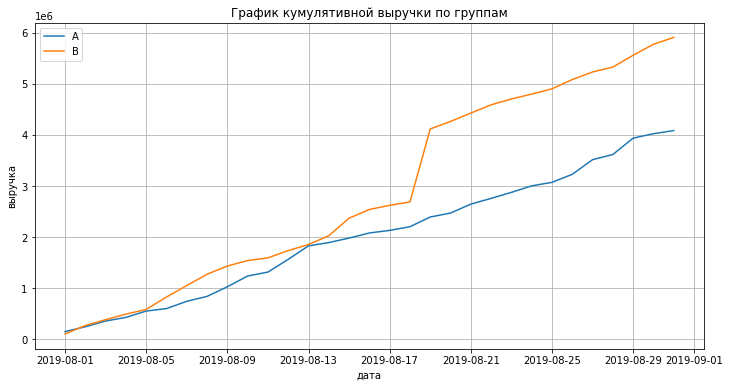

In [20]:
# построим график кумулятивной выручки по дням и группам A/B-тестирования

plt.figure(figsize=(12, 6))


plt.plot(group_a['date'], group_a['revenue'], label='A')
plt.plot(group_b['date'], group_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка')

plt.grid()
plt.legend();

Мы видим как выручка в обеих группах растет со временем, однако в **группе В** выручка с первых дней исследования немного выше выручки в **группе А**.

Также мы можем видеть резкий резкий рост в **группе В** - это может быть связано с большим числом заказов или о появление очень дорогих заказов, после этого роста выручка в этой группе стала значительно выше чем в **группе А**.

### 4.2. Построим график кумулятивного среднего чека по группам.

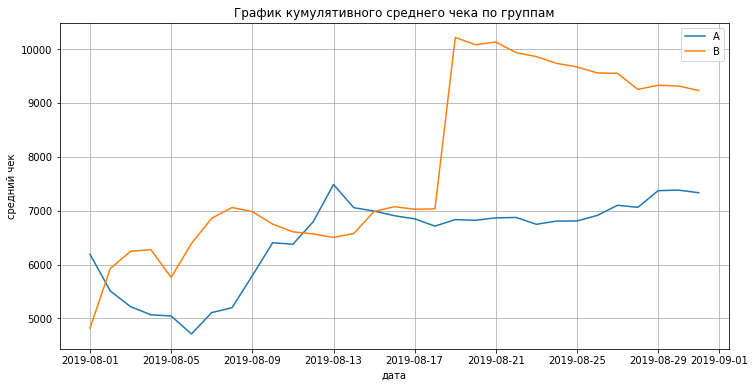

In [21]:
# построим график кумулятивного среднего чека по группам A/B-тестирования

plt.figure(figsize=(12, 6))


plt.plot(group_a['date'], group_a['mean_revenue'], label='A')
plt.plot(group_b['date'], group_b['mean_revenue'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')

plt.grid()
plt.legend();

Видим схожую картину, очень большой рост в **группе В**, а потом видем, что средний чек в этой группе начинает падать, видимо влияние очень дорогих заказов сказывается на среднем. 

В **Группе А** видим, что средний чек к концу графика сохраняется около **7 000**, тоже есть небольшие всплески.

### 4.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [22]:
# создадим merge_groups в который каждый столбец будет хранить кумулятивные данные одной из группы 

merge_groups = group_a.merge(group_b, on='date', suffixes=['_A','_B'])
merge_groups = merge_groups.drop(columns=['group_A', 'group_B'])

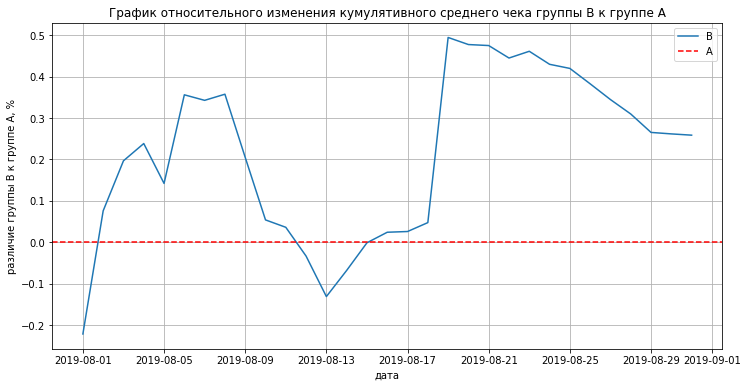

In [23]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.figure(figsize=(12, 6))

plt.plot(
    merge_groups['date'],
    (merge_groups['mean_revenue_B'] / merge_groups['mean_revenue_A'] - 1), label='B')


plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('различие группы В к группе А, %')
plt.axhline(y=0, linestyle='--', color='red', label='A')


plt.grid()
plt.legend();

Видим, что график различий нестабилен, сильно скачет в нескольких местах, что приводит к различиям до 50%. 

К концу различия **группы В** начинает выравниваться к **группе А**.

Мы точно видим, что в данные есть выбросы, которые влияют на данные.

### 4.4. Построим график кумулятивной конверсии по группам.

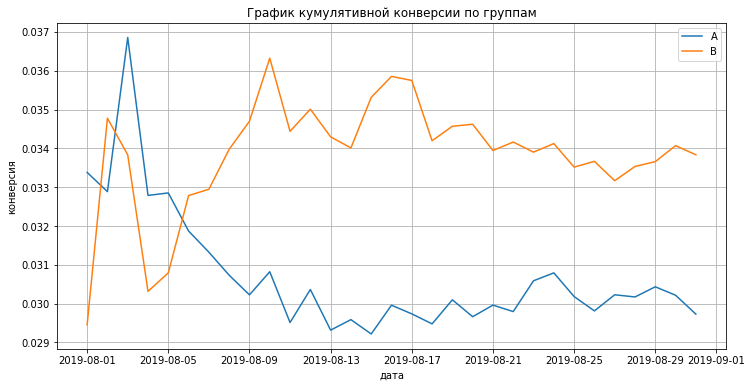

In [24]:
# построим график кумулятивной конверсии по группам A/B-тестирования

plt.figure(figsize=(12, 6))


plt.plot(group_a['date'], group_a['conversion'], label='A')
plt.plot(group_b['date'], group_b['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')

plt.grid()
plt.legend();

Конверсия **группы В** значительно выше чем у **группы А**.

На графике видно резкий подъем конверсии у **группы В**, но затем она начинает потихоньку падать, но в самом конце опять начинает немного подниматься. Сложно сказать зафиксировалась ли конверсия у **группы В**.

У **группы А** конверсия постабильнее и держится около отметки **3%**.

### 4.5. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

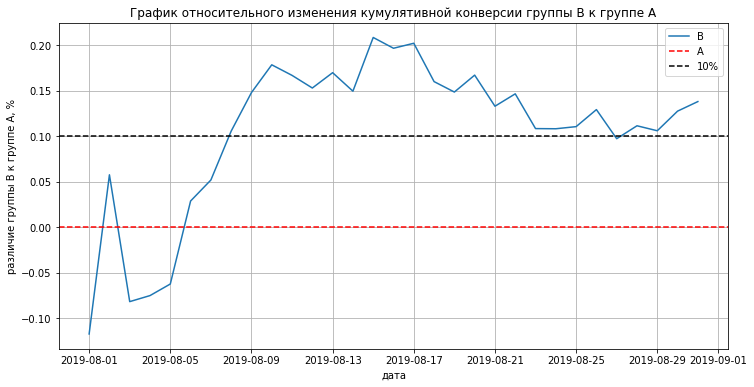

In [25]:
# построим график относительного изменения кумулятивной конверсии группы B к группе A

plt.figure(figsize=(12, 6))

plt.plot(
    merge_groups['date'],
    (merge_groups['conversion_B'] / merge_groups['conversion_A'] - 1), label='B')


plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')
plt.ylabel('различие группы В к группе А, %')
plt.axhline(y=0, linestyle='--', color='red', label='A')
plt.axhline(y=0.1, linestyle='--', color='black', label='10%')


plt.grid()
plt.legend();

Конверсия **группы В** выше чем у **группы А**, но опять же резкий подъем, а затем спуск. В конце графика видим, что конверсия снова начинает подниматься, но сложно сказать зафиксировалась она или нет. Думаю, что выбросы сильно влияют на её результаты.

### 4.6. Построим точечный график количества заказов по пользователям.

In [26]:
# создадим переменную orders_by_users в которой посчитаем количество заказов по пользователям

orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

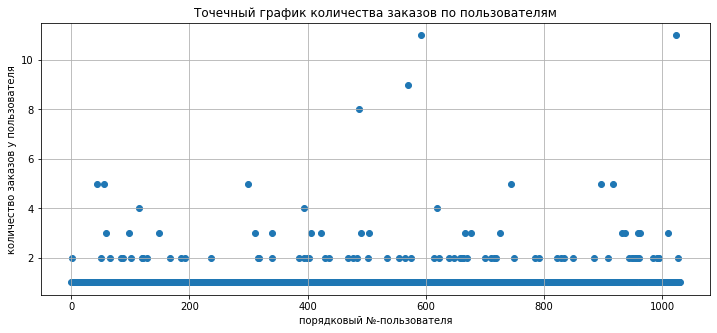

In [27]:
# построим точечный график количества заказов по пользователеям, чтобы выявить выбросы в данных

# создадим данные для оси х

x_values = pd.Series(range(0, len(orders_by_users)))

# построим точечный график

plt.figure(figsize=(12,5))

plt.scatter(x_values, orders_by_users['transaction_id'])
plt.grid()

plt.xlabel('порядковый №-пользователя')
plt.ylabel('количество заказов у пользователя')

plt.title('Точечный график количества заказов по пользователям');

Видим, что большинство пользователей оформляют 1 заказ, также можно увидеть много пользователей оформивших **2-5** заказов, но непонятно считать их аномалиями или нет.

### 4.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [28]:
# посчитаем перцентили количества заказов на пользователя

print(np.percentile(orders_by_users['transaction_id'], [95, 99]))

[2. 4.]


**Мы видим следующее:**
- **95%** пользователей оформляют не более двух заказов;
- Не более **1%** пользователей оформляют больше четырех заказов.

Давайте возьмем **2** за нижнюю границу числа заказов у одного пользователя, таким образом мы учтем порядка **95%** всех пользователей. С учетом того, что большая часть пользователей оформляют **1** заказ, то **4** заказа на пользователя кажется как аномалия, хотя с другой стороны для интернет-магазина может быть и нормой, но всё же, оставим границу - **2** заказа.



### 4.8. Построим точечный график стоимостей заказов.

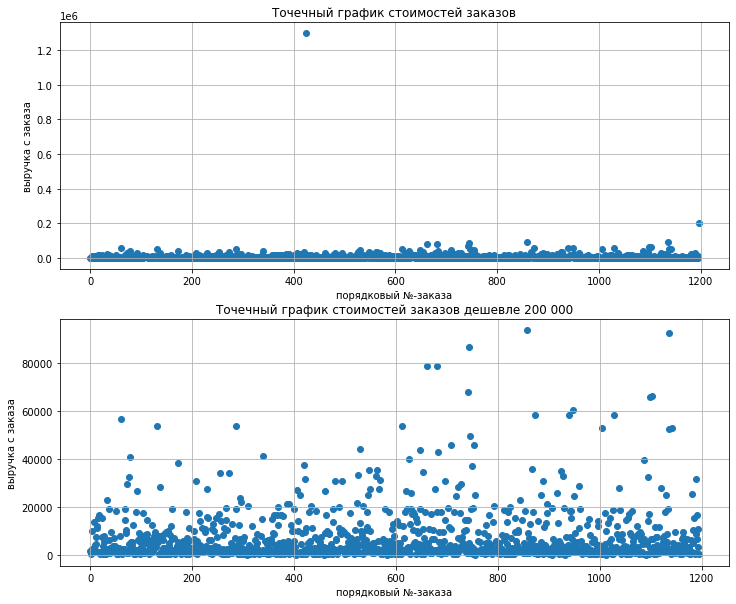

In [29]:
# построим точечный график стоимостей заказов

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)


plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.xlabel('порядковый №-заказа')
plt.ylabel('выручка с заказа')
plt.title('Точечный график стоимостей заказов')

x_values = pd.Series(range(0, len(orders.query('revenue < 200000')['revenue'])))

plt.subplot(2,1,2)

plt.scatter(x_values, orders.query('revenue < 200000')['revenue'])
plt.grid()
plt.xlabel('порядковый №-заказа')
plt.ylabel('выручка с заказа')
plt.title('Точечный график стоимостей заказов дешевле 200 000');

Видим как минимум **два** выбивающихся заказа:
- стоимостью около 200 000,
- стоимостью около 1 200 000. 

В остальном сложно сказать об остальных стоимостях, все они распологаются в диапазоне ниже 200 000.

### 4.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [30]:
# посчитаем перцентили стоимости заказа

print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Примем порог максимальнос стоимости заказа **28 000** таким образом мы уберем не более **5%** пользователей.

### Подготовим данные для статистических тестов

Ранее мы создали датафрей **merge_groups** в котором по столбцам собранные кумулятивные данные каждой из групп, давайте дополним эту таблицу и подготовим ее для дальнейшего исследования.

In [31]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [32]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
# переменуем столбцы, чтобы вдальнейшем не запутаться

merge_groups = merge_groups.rename(columns=
                                   {
                                       'orders_A': 'orders_cummulative_A',
                                       'orders_B': 'orders_cummulative_B',
                                       'revenue_A': 'revenue_cummulative_A',
                                       'revenue_B': 'revenue_cummulative_B',
                                       'visitors_A': 'visitors_cummulative_A',
                                       'visitors_B': 'visitors_cummulative_B'
                                   })

# удалим не нужные столбцы

merge_groups = merge_groups.drop(columns=['buyers_A', 
                                          'buyers_B', 
                                          'mean_revenue_A', 
                                          'conversion_A', 
                                          'mean_revenue_B', 
                                          'conversion_B'])

# выведем на экран

merge_groups.head(10)

,date,orders_cummulative_A,revenue_cummulative_A,visitors_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_cummulative_B
0,2019-08-01,24,148579,719,21,101217,713
1,2019-08-02,44,242401,1338,45,266748,1294
2,2019-08-03,68,354874,1845,61,380996,1803
3,2019-08-04,84,425699,2562,78,489567,2573
4,2019-08-05,109,549917,3318,101,581995,3280
5,2019-08-06,127,598401,3985,129,824337,3935
6,2019-08-07,145,740818,4629,153,1049671,4644
7,2019-08-08,161,837097,5239,180,1270589,5298
8,2019-08-09,177,1025603,5856,205,1431401,5908
9,2019-08-10,193,1236098,6262,228,1539203,6277


Таблица с кумулятивнымы данными практически готова, единственное, что не хватает это данные за указанные даты, не кумялятивные, поэтому давайте добавим еще несколько столбцов данными:
- о количестве заказов в выбронную дату,
- вырочка в выбранную дату,
- количество пользователей в выбранную дату.

Для этого создадим соответствующие переменные.


In [34]:
# создадим переменные в которых будет отображаться данные только за выбранную дату, не кумулятивные

# для группы А посчитаем количество заказов и суммарную вырочку в этот день

orders_daily_a = (
    orders.query('group == "A"')
    .groupby('date', as_index=False)
    .agg(
        {
            'transaction_id': 'nunique',
            'revenue': 'sum'
        })
    .rename(columns=
            {
                'transaction_id': 'orders_per_date_A',
                'revenue': 'revenue_per_date_A'
            })
                 )

# для группы В посчитаем количество заказов и суммарную вырочку в этот день

orders_daily_b = (
    orders.query('group == "B"')
    .groupby('date', as_index=False)
    .agg(
        {
            'transaction_id': 'nunique',
            'revenue': 'sum'
        })
    .rename(columns=
            {
                'transaction_id': 'orders_per_date_B',
                'revenue': 'revenue_per_date_B'
            })
                 )

In [35]:
# создадим две таблицы с визитами

visitors_daily_a = visitors.query('group == "A"').rename(columns={'visitors': 'visitors_daily_A'}).drop(columns='group')
visitors_daily_b = visitors.query('group == "B"').rename(columns={'visitors': 'visitors_daily_B'}).drop(columns='group')

In [36]:
# теперь можно объеденить все в merge_groups

merge_groups = (merge_groups
                .merge(orders_daily_a, on='date', how='left')
                .merge(visitors_daily_a, on='date', how='left')
                .merge(orders_daily_b, on='date', how='left')
                .merge(visitors_daily_b, on='date', how='left')
               )

# поменяем местами столбцы для удобства использования

merge_groups = merge_groups[[
    'date', 
    'orders_per_date_A',
    'orders_cummulative_A',
    'revenue_per_date_A',
    'revenue_cummulative_A',
    'visitors_daily_A',
    'visitors_cummulative_A',
    'orders_per_date_B',
    'orders_cummulative_B',
    'revenue_per_date_B',
    'revenue_cummulative_B', 
    'visitors_daily_B',
    'visitors_cummulative_B'
]]

In [37]:
# выведем на экран нашу таблицу

merge_groups.head()

,date,orders_per_date_A,orders_cummulative_A,revenue_per_date_A,revenue_cummulative_A,visitors_daily_A,visitors_cummulative_A,orders_per_date_B,orders_cummulative_B,revenue_per_date_B,revenue_cummulative_B,visitors_daily_B,visitors_cummulative_B
0,2019-08-01,24,24,148579,148579,719,719,21,21,101217,101217,713,713
1,2019-08-02,20,44,93822,242401,619,1338,24,45,165531,266748,581,1294
2,2019-08-03,24,68,112473,354874,507,1845,16,61,114248,380996,509,1803
3,2019-08-04,16,84,70825,425699,717,2562,17,78,108571,489567,770,2573
4,2019-08-05,25,109,124218,549917,756,3318,23,101,92428,581995,707,3280


Мы создали **merge_groups** в которой каждый столбец отображает данные за одну из двух групп, в ней собраны данные за дату и кумулятивные данные до этой даты.

**Описание merge_groups**:
- `date` - дата,
- `orders_per_date_A` -  количество заказов в выбранную дату в группе A,
- `orders_cummulative_A` - суммарное число заказов до выбранной даты включительно в группе A,
- `revenue_per_date_A` - суммарная выручка в выбранную дату в группе A,
- `revenue_cummulative_A` - суммарная выручка до выбранной даты включительно в группе A,
- `visitors_daily_A` -  количество пользователей в выбранную дату в группе A,
- `visitors_cummulative_A` - количество пользователей до выбранной даты включительно в группе A,
- `orders_per_date_B` -  количество заказов в выбранную дату в группе В,
- `orders_cummulative_B` - суммарное число заказов до выбранной даты включительно в группе В,
- `revenue_per_date_B` - суммарная выручка в выбранную дату в группе В,
- `revenue_cummulative_B` - суммарная выручка до выбранной даты включительно в группе В,
- `visitors_daily_B` -  количество пользователей в выбранную дату в группе В,
- `visitors_cummulative_B` - количество пользователей до выбранной даты включительно в группе В.



**Теперь мы готовы двигаться дальше**

### 4.10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [38]:
# создадим две новых переменные в которых будет пользователь и число его заказов

orders_by_user_A = (
    orders.query('group == "A"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns=
            {
                'visitor_id': 'user_id', 
                'transaction_id': 'orders'})
                   )

orders_by_user_B = (
    orders.query('group == "B"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns=
            {
                'visitor_id': 'user_id', 
                'transaction_id': 'orders'})
                   )





In [39]:
# для расчета на необходимо учитывать всех пользователей, даже тех кто ничего не заказал
# создадим две новых переменные sample_A и sample_B в которых будет список всех пользователей, даже тех кто ничего не заказал

# для группы А

sample_A = pd.concat(
    [
        orders_by_user_A['orders'],
        pd.Series(0, 
                  
                  # Нули для пользователей, которые ничего не заказывали. 
                  # Их количество равно разнице между суммой посетителей и количеством записей о заказах
                  
                  index = np.arange(
                      merge_groups['visitors_daily_A'].sum() - len(orders_by_user_A['orders'])
                                   ) 
                 )
    ], 
    axis=0
)

# для группы В

sample_B = pd.concat(
    [
        orders_by_user_B['orders'],
        pd.Series(0, 
                  
                  # Нули для пользователей, которые ничего не заказывали. 
                  # Их количество равно разнице между суммой посетителей и количеством записей о заказах
                  
                  index = np.arange(
                      merge_groups['visitors_daily_B'].sum() - len(orders_by_user_B['orders'])
                                   ) 
                 )
    ], 
    axis=0
)

Таким образом у нас получилось две переменные **sample_А** и **sample_B** длина которых соответствует количеству пользователей, а список количество заказов для каждого пользователя. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке.

Проверим гипотезу:
- Н0 - статистических значимых различий в конверсии между группами нет,
- Н1 - статистически значимые различия в конверсии между группами есть.

Уровень статитистической значимости установим - 5%.

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо. 

Поэтому далее мы будем использовать **непараметрический тест Уилкоксона-Манна-Уитни**

In [40]:
# статистическую значимость различий в конверсии между группами по «сырым» данным.
# уровень статистической значимости зададим 5%

alpha = .05

result = stats.mannwhitneyu(sample_A, sample_B)

print('p-value = {:.3%}'.format(result[1]))

if result[1] < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами есть!')
else:
    print('Не отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами нет!')

    
print('Относительное изменение группы В к группе А составляет: {:.3%}'
      .format(sample_B.mean() / sample_A.mean() - 1)
     )

p-value = 1.679%
Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами есть!
Относительное изменение группы В к группе А составляет: 13.808%


По "сырым" данным мы видим, что статистические **различиме конверсии между группами есть**. И видим, что **группа В** относительнно выигрывает у **группы А** почти на **14%**.

### 4.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверим гипотезу:
- Н0 - статистических значимых различий в среднем чеке заказа между группами нет,
- Н1 - статистически значимые различия в среднем чеке заказа между группами есть.

Уровень статитистической значимости установим - 5%.

In [41]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
# уровень значимости у нас 5% (установили ранее)

result = stats.mannwhitneyu(
    orders.query('group == "A"')['revenue'], 
    orders.query('group == "B"')['revenue']
                           )

print('p-value = {:.3%}'.format(result[1]))

if result[1] < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами есть!')
else:
    print('Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами нет!')

    
print('Относительное изменение группы В к группе А составляет: {:.3%}'
      .format(orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1)
     )

p-value = 72.929%
Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами нет!
Относительное изменение группы В к группе А составляет: 25.871%


p-value около 73%, поэтому мы не отвергаем нулевую гипотезу, статистически значимые различия в среднем чеке заказа между группами нет. Отдако средний чек **группы В** значительно выше, чем у **группы А**, почти на 26%.

### 4.12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Ранее мы заметили, что в данных есть аномальные значения. Мы решили взять **2** за нижнюю границу числа заказов у одного пользователя, таким образом мы учтем порядка **95%** всех пользователей, и возьмем порог максимальнос стоимости заказа **28 000** таким образом мы уберем не более **5%** пользователей.


In [42]:
# выявим id пользователей совершивших аномальные заказы 

# выявим пользователей совершивших больше 2 заказов

users_with_many_orders = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
users_with_many_orders = users_with_many_orders.query('transaction_id > 2')['visitor_id']

# и пользователей совершивших заказы больше 28 000 

users_with_expensive_orders = orders.query('revenue > 28000')['visitor_id']

abnormal_users = pd.concat(
    [
        users_with_many_orders, 
        users_with_expensive_orders
    ], 
    axis=0).drop_duplicates().sort_values()

print(f'Выявлено {len(abnormal_users)} аномальных пользователей.')

Выявлено 83 аномальных пользователей.


Давайте узнаем как действия аномальных пользователей повлияли на результы, посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [43]:
# очистем данные от аномальных пользователей

# для группы А

sample_A_filtered = pd.concat(
    [
        orders_by_user_A
        [
            np.logical_not(orders_by_user_A['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(0, 
                  
                  # Нули для пользователей, которые ничего не заказывали. 
                  # Их количество равно разнице между суммой посетителей и количеством записей о заказах
                  
                  index = np.arange(
                      merge_groups['visitors_daily_A'].sum() - len(orders_by_user_A['orders'])
                                   ) 
                 )
    ], 
    axis=0
)

# для группы В

sample_B_filtered = pd.concat(
    [
        orders_by_user_B
        [
            np.logical_not(orders_by_user_B['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(0, 
                  
                  # Нули для пользователей, которые ничего не заказывали. 
                  # Их количество равно разнице между суммой посетителей и количеством записей о заказах
                  
                  index = np.arange(
                      merge_groups['visitors_daily_B'].sum() - len(orders_by_user_B['orders'])
                                   ) 
                 )
    ], 
    axis=0
)

In [44]:
# статистическую значимость различий в конверсии между группами по «очищенным» данным.
# уровень статистической значимости зададим 5%

alpha = .05

result = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)

print('p-value = {:.3%}'.format(result[1]))

if result[1] < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами по «очищенным» данным есть!')
else:
    print('Не отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами по «очищенным» данным нет!')

    
print('Относительное изменение группы В к группе А по «очищенным» составляет: {:.3%}'
      .format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1)
     )

p-value = 1.217%
Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами по «очищенным» данным есть!
Относительное изменение группы В к группе А по «очищенным» составляет: 17.569%


**Результаты по конверсии практически не изменились.**

### 4.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [45]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
# уровень значимости у нас 5% (установили ранее)

result = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == "A",
            np.logical_not(orders['visitor_id'].isin(abnormal_users))
        )]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == "B",
            np.logical_not(orders['visitor_id'].isin(abnormal_users))
        )]['revenue']
)

print('p-value = {:.3%}'.format(result[1]))

if result[1] < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами  по «очищенным» данным есть!')
else:
    print('Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами  по «очищенным» данным нет!')

    
print('Относительное изменение группы В к группе А  по «очищенным» данным составляет: {:.3%}'
      .format(
          orders[
              np.logical_and(orders['group'] == "A",
                             np.logical_not(orders['visitor_id'].isin(abnormal_users)))
          ]['revenue'].mean() 
          / orders[
              np.logical_and(orders['group'] == "B",
                             np.logical_not(orders['visitor_id'].isin(abnormal_users)))
          ]['revenue'].mean() - 1
      )
     )

p-value = 75.287%
Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами  по «очищенным» данным нет!
Относительное изменение группы В к группе А  по «очищенным» данным составляет: 2.261%


Мы видим:
- p-value повысылся с 73% до 75%,
- разница между сегментами сократилась с 26%, до 2%, но все равно относительная разница группы В к группе А положительная.


Общие данные по результатам теста не изменились, мы видим как сильно на данные повлияли аномалии.

### 4.14. Примем решение по результатам теста.

Давайте еще раз разберем все с самого начала и сделаем выводы по результатам исследования.

В нашем распоряжении было 9 гипотез, из которых фреймворком **RICE** мы выбрали:
- Гипотезу №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Она показала лучший результат: у нее хороший охват пользователейи относительно хорошее влияние, также один из лучших показателей уверенности и средние трудозатраты среди других гипотез.

Далее мы провели A/B-тест и получили результаты, в ходе исследования мы выявили аномальные показатели и сравнили "сырае" данные и "очищенные", давайте далее для принятия решения будем опиратсья на "очищенные" данные.

**Подготовим данные для построения графиков**.

In [46]:
# очистим данные от аномальных пользователей

filtered_orders = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

In [47]:
# создадим cumulative_filter_data в которой войдут кумулятивные данные: выручки, среднего чека и конверсии

cumulative_filter_data = (
    filtered_orders.groupby(['date', 'group'], as_index=False)
    .agg(
        {
            'transaction_id': 'nunique',
            'revenue': 'sum'
        })
)



In [48]:
# добавим количество визитов в указанную дату и группу

cumulative_filter_data = cumulative_filter_data.merge(visitors, on=['date', 'group'], how='left')

# поделим на группы

filtered_group_A = (
    cumulative_filter_data.query('group == "A"')
    .drop(columns='group')
    .rename(columns={'transaction_id': 'orders'})
)

filtered_group_B = (
    cumulative_filter_data.query('group == "B"')
    .drop(columns='group')
    .rename(columns={'transaction_id': 'orders'})
)



In [49]:
# подсчитаем кумулятивные данные

filtered_group_A[['orders', 'revenue', 'visitors']] = (
    np.cumsum(filtered_group_A[['orders', 'revenue', 'visitors']], axis=0)
)

filtered_group_B[['orders', 'revenue', 'visitors']] = (
    np.cumsum(filtered_group_B[['orders', 'revenue', 'visitors']], axis=0)
)

In [50]:
# соберем данные в одину таблицу

filtered_data = filtered_group_A.merge(filtered_group_B, on='date', suffixes=['_A', '_B'])

**Давайте построим кумулятивные графики по "очищенным" данным.**

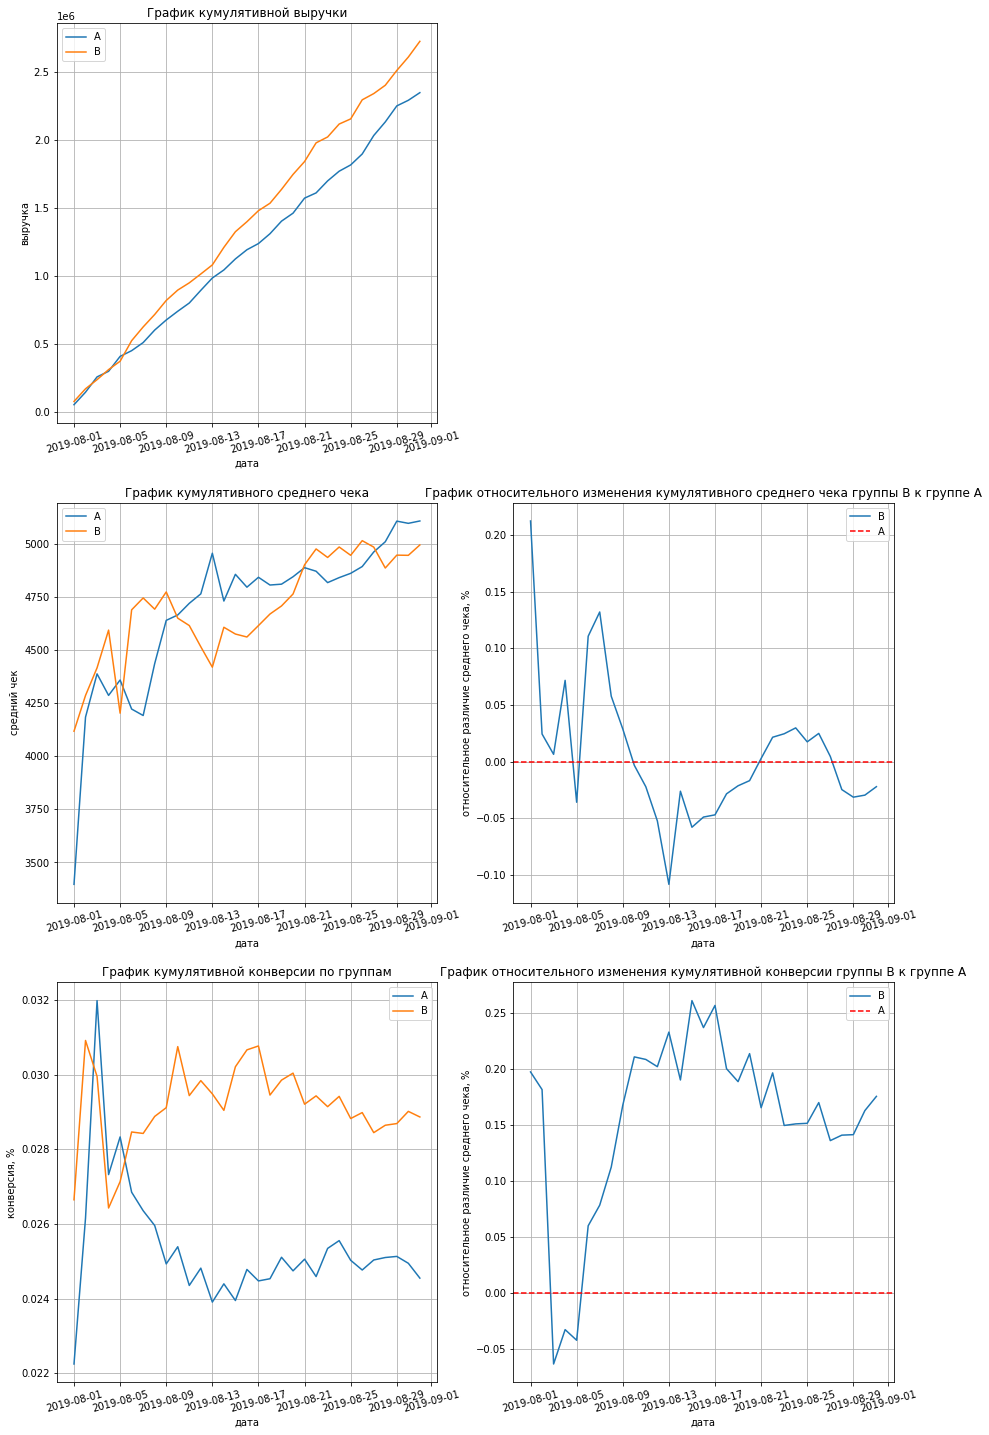

In [51]:
# построим кумулятивные графики по "очищенным" данным

plt.figure(figsize=(15,25))

# построим график кумулятивной выручки по группам

plt.subplot(3, 2, 1)

plt.plot(filtered_group_A['date'], filtered_group_A['revenue'], label='A')
plt.plot(filtered_group_B['date'], filtered_group_B['revenue'], label='B')
plt.title('График кумулятивной выручки')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.grid()
plt.xticks(rotation=15)
plt.legend()

# построим график кумулятивного среднего чека по группам

plt.subplot(3, 2, 3)

plt.plot(
    filtered_group_A['date'], 
    (filtered_group_A['revenue'] / filtered_group_A['orders']),
    label='A')

plt.plot(
    filtered_group_B['date'], 
    (filtered_group_B['revenue'] / filtered_group_B['orders']),
    label='B')

plt.title('График кумулятивного среднего чека')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.grid()
plt.xticks(rotation=15)
plt.legend()

# построим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.subplot(3, 2, 4)

plt.plot(
    filtered_data['date'], 
     (
         (filtered_data['revenue_B'] / filtered_data['orders_B'])
         /(filtered_data['revenue_A'] / filtered_data['orders_A']) 
         - 1),
    label='B'
)


plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительное различие среднего чека, %')
plt.axhline(y=0, color='red', linestyle='--', label='A')
plt.grid()
plt.xticks(rotation=15)
plt.legend()

# построим график кумулятивной конверсии по группам

plt.subplot(3, 2, 5)

plt.plot(
    filtered_group_A['date'], 
    (filtered_group_A['orders'] / filtered_group_A['visitors']),
    label='A')

plt.plot(
    filtered_group_B['date'], 
    (filtered_group_B['orders'] / filtered_group_B['visitors']),
    label='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('конверсия, %')
plt.grid()
plt.xticks(rotation=15)
plt.legend()

# построим график относительного изменения кумулятивной конверсии группы B к группе A

plt.subplot(3, 2, 6)

plt.plot(
    filtered_data['date'], 
     (
         (filtered_data['orders_B'] / filtered_data['visitors_B'])
         /(filtered_data['orders_A'] / filtered_data['visitors_A']) 
         - 1),
    label='B'
)


plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительное различие среднего чека, %')
plt.axhline(y=0, color='red', linestyle='--', label='A')
plt.grid()
plt.xticks(rotation=15)
plt.legend();



Давайте еще для удобства вспомним результаты статистических тестов:

- Результаты статистических тестов **о различии в конверсии** между группами:


 - **по "сырым" данным**: 
  - p-value = 1.679%
  - Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами **есть**!
  - Относительное изменение группы В к группе А составляет: 13.808%
  
  
 - **по "очищенным" данным**:
  - p-value = 1.217%
  - Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами по «очищенным» данным **есть**!
  - Относительное изменение группы В к группе А по «очищенным» составляет: 17.569%


- Результаты статистических тестов **о различии в среднем чеке заказа** между группами:


 - **по "сырым" данным**:
  - p-value = 72.929%
  - Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами **нет**!
  - Относительное изменение группы В к группе А составляет: 25.871%


 - **по "очищенным" данным**:
  - p-value = 75.287%
  - Не отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке заказа между группами  по «очищенным» данным **нет**!
  - Относительное изменение группы В к группе А  по «очищенным» данным составляет: 2.261%

**И теперь соберем немного данных о самом А/В-тесте**

In [52]:
print('''

A/В-тест длился с {} по {}.

В его участие было {} визитов пользователей:
- в группе А: {} визитов;
- в группе В: {} визитов.

'''.format(
    visitors['date'].dt.date.min(),
    visitors['date'].dt.date.max(),
    visitors['visitors'].sum(),
    visitors.query('group == "A"')['visitors'].sum(),
    visitors.query('group == "B"')['visitors'].sum()
)
     )



A/В-тест длился с 2019-08-01 по 2019-08-31.

В его участие было 37652 визитов пользователей:
- в группе А: 18736 визитов;
- в группе В: 18916 визитов.




**Имеющиеся факты:**
- длительность теста составляла - 1 месяц;
- было зарегестрированно 37 652 визита пользователей;
- в данных были выявленны аномльные покупки: либо очень дорогие, либо заказов больше среднего;
- есть статистически значимое отличие по конверсии между группами, как по "сырым" данным, так и по "очищенным";
- нет статистически значимого отличия в среднем чеке заказа между группами, как по "сырым" данным, так и по "очищенным". Причем разница между сегментами сократилась примерно с 26%, до 2%, но все равно относительная разница группы В к группе А положительная. Это может говорить о том, что на результат влияли аномально дорогие заказы.
- на графиках мы видим:
 - кумулятивная выручка группы В стабильно выше кумулятивной выручки группы А за весь период исследования. Если рассматривать график по "сырым" данным, то там есть очень большой рост выручки, который возможно связан с аномально дорогими покупками, но всё равно даже на графике с "очищенными" данными кумулятивная выручка группы В стабильно лучше кумулятивной выручки группы А;
 - кумулятивный средний чек на графике с "сырыми" данными умеет высокий рост у группы В и затем потихоньку уменьшается, но все равно средний чек с момент увеличения выше чем у группы А. При исследовании того же графика, но с "очищенными" данными ситуация меняется, потому что аномалии не влияют на результат и мы можем заметить, что определенного лидера между группами нет, графики переплетаются. Но все же в самом конце средний чек у группы А чуть выше;
 - на графике относительнного изменения среднего чека группы В к группе А по "сырым" данным мы видим превосходство у группы В, причем опять возможно связанное с аномально дорогими заказами, потому что в "очищенных" данных ситуация меняется и здесь нет явного победителя, они чередуются, причем в самом конце средний чек у группы В меньше чем у группы А примерно на 2%-3%, но стремится вверх;
 - на графике кумулятивной конверсии в обоих случаях (по "сырым" и "очищенным" данным) результаты группы В лучше чем у группы А примерно на 5-6%;
 - такую же положительнную динамику видим и на графики относительного изменения конверсии группы В к группе А и опять же в обоих случаях (по "сырым" и "очищенным" данным) и здесь показатели группы В примерно на 15% лучше, чем у группы А.
 

**Исходя из обнаруженных фактов мы видим:**

- мы не нашли статистически значимых отличий среднего чека между группами А и В, это может быть обусловленно тем, что стоимость товаров в нашем интернет-магазине не изменилась для пользователей из этих групп;
- конверсия у группы В за все исследования выше чем у группы А, причем стабильно за весь период.


**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** - позволило улучшить конверсию пользователей примерно на 5%, следовательно подняв кумулятивную выручку - этот показатель стабилен за все время исследование. Причем на этот результат не сильно повлияли аномалии в стоимости и количестве заказов. А относительного изменения конверсии группы В к группе А примерно на 15% лучше.

**Мы можем: остановить тест, зафиксировать победу групп В!**
